<a href="https://colab.research.google.com/github/ddoddii/Mycolab/blob/master/%ED%95%A0%EC%88%98%EC%9E%88%EC%A1%B0_HW3_pc3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Clustering

1. Hierarchical clustering

- linkage method를 다양하게 (2개 이상) 설정하여 결과 비교

- 적절한 군집 수 설정 (dendrogram 시각화)

- 결과 해석 (평가 및 Cluster별 특징 설명 등)

2. K-Means clustering

- 최적의 군집 수 설정

- K-means 군집 분석 수행

- 결과 해석 (평가 및 Cluster별 특징 설명 등)

데이터 선택 이유.
글로벌 와인 리서치 기관인 와인 인텔리전스는 ‘세계에서 가장 매력적인 와인 시장’ 2위로 한국을 선정했다. 실제로 국내 와인 시장은 전례 없는 호황을 누리고 있다. 와인 소매시장의 매출은 이미 2020년 7347억원을 넘겼고, 올해는 1조원을 넘길 것으로 전망된다.와인 수입량도 2019년 4만3495톤에서 2021년 7만6575톤으로 크게 늘어났다.
출처 : 시사저널(http://www.sisajournal.com)

따라서 와인의 각 성분함량 (각각의 성분은 특정한 맛을 갖기도 함)과 색깔, 농도 등의 특성으로 클러스터링을 진행하여 와인을 군집화하고 어떤 변수들이 클러스터링에 해당되는지 인사이트를 갖고 추후 클러스터링된 와인으로 와인 맛에 대한 연구나 마케팅을 위한 추가적인 연구가 가능하기에 해당 데이터셋으로 실습을 진행하였다. 또한 모든 변수가 숫자형 변수로 되어있어 군집화하기 용이하기에 선택하였다.

데이터는 https://www.kaggle.com/datasets/harrywang/wine-dataset-for-clustering 캐글에서 가져왔다.

## Data 불러오기 및 전처리

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
data=pd.read_csv('/content/drive/Shareddrives/데마 팀플/할수있조_HW3/wine-clustering.csv')   #데이터셋 불러오기
print(data)

     Alcohol  Malic_Acid   Ash  Ash_Alcanity  Magnesium  Total_Phenols  \
0      14.23        1.71  2.43          15.6        127           2.80   
1      13.20        1.78  2.14          11.2        100           2.65   
2      13.16        2.36  2.67          18.6        101           2.80   
3      14.37        1.95  2.50          16.8        113           3.85   
4      13.24        2.59  2.87          21.0        118           2.80   
..       ...         ...   ...           ...        ...            ...   
173    13.71        5.65  2.45          20.5         95           1.68   
174    13.40        3.91  2.48          23.0        102           1.80   
175    13.27        4.28  2.26          20.0        120           1.59   
176    13.17        2.59  2.37          20.0        120           1.65   
177    14.13        4.10  2.74          24.5         96           2.05   

     Flavanoids  Nonflavanoid_Phenols  Proanthocyanins  Color_Intensity   Hue  \
0          3.06               

변수 설명
와인의 맛을 이루는 3대 요소는 **탄닌(떫은 맛), 산(신맛), 당(단맛)**이다. (The three major elements that make up the wine taste are tannins, acid (sour), sugar (sweet).)

Alcohol: 알코올 도수 Degree of Alcohol

Malic acid : 말산, 과일의** 유쾌한 신맛** (와인 특유의 신맛을 나타내는 성분) one of the principal organic acids found in wine grapes. 


Ash : 회분, 증발 잔류물의 회분 후 잔류하는 물질의 종합, 주요 원소는 알칼리 금속 및 알칼리 토금속 및 비금속 인이다. 영양학에서, **음식물 속에 들어 있는 무기물** 또는 그것의 전체 분량에 대한 비율을 이르는 말.(In nutrition, the term refers to the proportion of minerals in food or the total amount of it)


Alcalinity of ash : 회분의 알칼리도는 암모늄 이온을 제외한 **양이온(약간 쓴맛)과 와인의 유기산(상쾌하고 청량한 맛)의 합**으로 정의됨, 재의 알칼리도는 리터당 밀리당량 또는 탄산칼륨 리터당 그램으로 표시됨.

Magnesium : 마그네슘 (마그네슘 양이온이 쓰고 쓴 맛을 냄)

Total phenols : 페놀, 페닐기에 하이드록시기가 결합한 방향족 화합물, 무색의 결정으로 휘발성이며 **향긋한 냄새**가 난다. 와인에 들어있는 phenols의 전체 양(Total amount of phenols in the wine)


Flavanoids : 식물이나 균류의 이차대사산물의 일종, 레드 와인의 페놀 성분 중 최대 90% 비율을 나타내는 폴리 페놀 성분들 플라보노이드 라고 한다. **떫은 맛**을 내는 탄닌이 플라보노이드에 속한다.(In red wine, up to 90% of the wine's phenolic content falls under the classification of flavonoids.)


Nonflavanoid phenols : 비 플라보노이드, 90% 성분을 제외한 10%의 페놀 성분들(10% phenolic content)


Proanthocyanins : 프로안토시아니딘, 크랜베리 블루베리 포도씨와 같은 식물에서 발견되는 폴리페놀의 일종, 심장혈관 질환의 발병률을 낮추는데 도움을 주는 성분.**떫은 맛**(A component that helps lower the incidence of cardiovascular disease.)
Color intensity


Color intensity : **색의 농도**


Hue: 와인을 잔에 따라 흔들었을 때 **와인과 글라스의 경계 부분의 색깔이 다른 정도**. Edge 라고도 한다.(When the wine is shaken by the glass, the color of the boundary between wine and glass is different. Also called Edge)

OD280/OD315 of diluted wines : 희석된 정도

Proline : 프롤린, 와인의 **아미노산** 성분 중 가장 많은 양을 차지함(one kind of amino acid), **단맛**의 성질을 가지고 있음

(1) Malic acid: It is a kind of acid with strong acidity and apple aroma. The red wine is naturally
accompanied by malic acid. (2) Ash: The essence of ash is an inorganic salt, which has an effect on
the overall flavor of the wine and can give the wine a fresh feeling. (3) Alkalinity of ash: It is a
measure of weak alkalinity dissolved in water. (4) Magnesium: It is an essential element of the
human body, which can promote energy metabolism and is weakly alkaline. (5) Total phenols:
molecules containing polyphenolic substances, which have a bitter taste and affect the taste, color
and taste of the wine, and belong to the nutrients in the wine. (6) Flavanoids: It is a beneficial
antioxidant for the heart and anti-aging, rich in aroma and bitter. (7) Nonflavanoid phenols: It is a
special aromatic gas with oxidation resistance and is weakly acidic. (8) Proanthocyanins: It is a
bioflavonoid compound, which is also a natural antioxidant with a slight bitter smell. (9) Color
intensity: refers to the degree of color shade. It is used to measure the style of wine to be “light” or
“thick”. The color intensity is high, meanwhile the longer the wine and grape juice are in contact
during the wine making process, the thicker the taste. (10) Hue: refers to the vividness of the color
and the degree of warmth and coldness. It can be used to measure the variety and age of the wine. 


- Clustering: 거리가 가까운 관측치들 간 유사한 특징이 있을 것이라는 가정을 기반으로 변수들을 군집화
- 계층적 클러스터링 (hierarchical clustering)과 비계층적 클러스터링(K-means clustering)으로 구분됨
- 이상치가 존재할 경우 클러스터링 진행 시 영향을 많이 받을 수 있으므로 사전에 제거 과정이 필요

In [ ]:
import warnings
warnings.filterwarnings(action='ignore')

In [ ]:
from IPython.display import display
display(data.head())
print('\n', data.shape)

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735



 (178, 13)


아래 그림을 보면 Ash_Alcanity, Magnesium, Color_Intensity와 같이 Outlier가 있는 변수들을 확인할 수 있다. 
이상치가 존재할 경우 클러스터링 진행 시 영향을 많이 받을 수 있으므로 사전에 제거해 주었다.

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

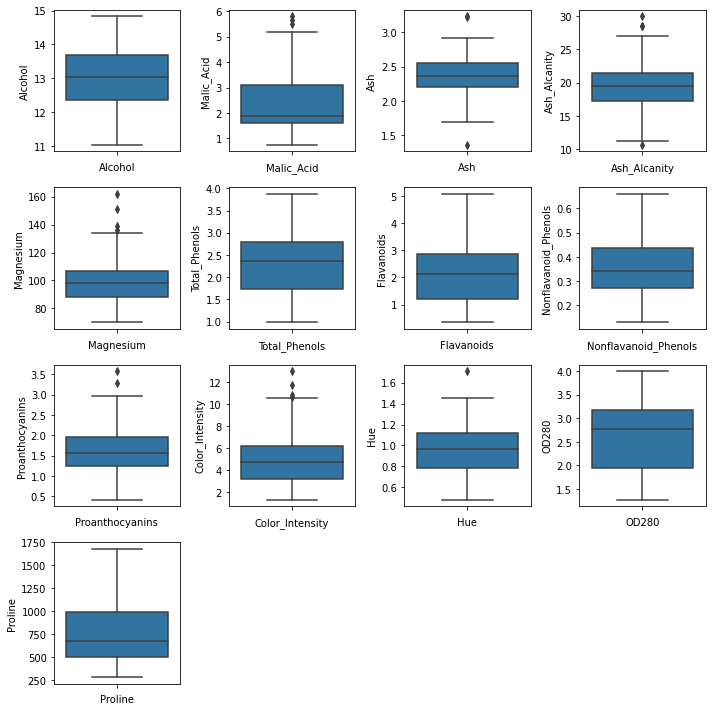

In [ ]:
fig = plt.figure(figsize=(10,10))
for i in range(len(data.columns)):
    fig.add_subplot(4,4,i+1)
    sns.boxplot(y=data.iloc[:,i])
    plt.xlabel(data.columns[i])
plt.tight_layout()
plt.show()

In [ ]:
# 이상치 제거 함수 (1Q - 1.5*IQR, 3Q + 1.5*IQR 을 넘어가는 값을 가진 행을 제거)
import numpy as np

def get_outlier(df=None, column=None, weight=1.5):
  quantile_25 = np.percentile(df[column].values, 25)
  quantile_75 = np.percentile(df[column].values, 75)

  IQR = quantile_75 - quantile_25
  IQR_weight = IQR*weight
  
  lowest = quantile_25 - IQR_weight
  highest = quantile_75 + IQR_weight
  
  outlier_idx = df[column][ (df[column] < lowest) | (df[column] > highest) ].index
  return outlier_idx

In [ ]:
for col in data.columns:
    outlier_idx = get_outlier(df=data, column=col, weight=1.5)
    data.drop(outlier_idx, axis=0, inplace=True)

In [ ]:
display(data.head())
print('\n', data.shape)

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735



 (161, 13)


large scale 데이터를 사용할 경우 계산량이 많아지며, 클러스터링 시 값의 range의 영향을 받기 때문에 표준화/scaling을 해주었다. 

다음은 scaling이 되기전의 기초 통계량이다.

In [ ]:
data.describe() # 기초통계량

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
count,161.000000,161.000000,161.000000,161.000000,161.000000,161.000000,161.000000,161.000000,161.000000,161.000000,161.000000,161.000000,161.000000
mean,13.034596,2.318199,2.364658,19.300621,98.590062,2.280435,2.026894,0.359006,1.538758,5.033913,0.956932,2.619876,753.819876
std,0.791422,1.053406,0.241922,2.974149,12.401347,0.628964,0.981421,0.121821,0.513838,2.155207,0.217376,0.713409,317.816297
min,11.410000,0.740000,1.700000,11.200000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.540000,1.270000,278.000000
25%,12.370000,1.610000,2.230000,17.200000,88.000000,1.700000,1.200000,0.270000,1.240000,3.270000,0.790000,2.000000,502.000000
50%,13.070000,1.860000,2.360000,19.000000,98.000000,2.320000,2.130000,0.340000,1.480000,4.800000,0.960000,2.780000,675.000000
75%,13.690000,3.100000,2.540000,21.000000,106.000000,2.800000,2.900000,0.430000,1.870000,6.200000,1.120000,3.180000,1020.000000
max,14.830000,5.190000,2.920000,27.000000,134.000000,3.880000,3.930000,0.660000,2.910000,10.680000,1.450000,4.000000,1680.000000


In [ ]:
from sklearn.preprocessing import StandardScaler #기본 스케일로 평균과 표준편차를 사용한다.
data_scale = pd.DataFrame(StandardScaler().fit_transform(data), columns=data.columns, index = data.index)

In [ ]:
data_scale

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
0,1.515163,-0.579166,0.270936,-1.248144,2.298023,0.828643,1.055948,-0.650569,1.466583,0.282097,0.383333,1.828097,0.982174
1,0.209648,-0.512507,-0.931537,-2.732175,0.114047,0.589411,0.749315,-0.815257,-0.505150,-0.304357,0.429479,1.096928,0.934830
2,0.158948,0.039806,1.266087,-0.236305,0.194935,0.828643,1.239928,-0.485881,2.481732,0.300715,0.337186,0.773526,1.360929
3,1.692612,-0.350622,0.561189,-0.843409,1.165591,2.503264,1.495455,-0.979945,1.251840,1.287448,-0.447308,1.167233,2.292034
4,0.260347,0.258826,2.095379,0.573166,1.570031,0.828643,0.677767,0.255215,0.549044,-0.332284,0.383333,0.436064,-0.059401
...,...,...,...,...,...,...,...,...,...,...,...,...,...
172,1.426439,0.182645,0.478259,0.235886,-0.613945,-0.957620,-1.356232,0.666936,-0.583238,2.171785,-1.554828,-1.279371,-0.296123
174,0.463146,1.515815,0.478259,1.247725,0.275823,-0.766235,-1.305127,0.584592,-0.251362,1.054728,-1.185655,-1.490285,-0.012057
175,0.298372,1.868152,-0.433962,0.235886,1.731807,-1.101159,-1.366453,0.584592,-0.368495,2.404505,-1.693268,-1.490285,0.256228
176,0.171623,0.258826,0.022149,0.235886,1.731807,-1.005466,-1.376675,1.408032,-0.153752,1.985609,-1.647122,-1.405919,0.272009


In [ ]:
data_scale.mean(axis=0).head()

Alcohol         3.082420e-15
Malic_Acid     -1.130910e-16
Ash             8.936951e-16
Ash_Alcanity   -7.033711e-17
Magnesium      -2.770386e-16
dtype: float64

In [ ]:
data_scale.cov() # 공분산행렬

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
Alcohol,1.006250,0.097255,0.226751,-0.340550,0.423865,0.327634,0.304448,-0.176371,0.216810,0.544236,-0.010545,0.109190,0.656502
Malic_Acid,0.097255,1.006250,0.184864,0.312967,0.030335,-0.371765,-0.463139,0.301514,-0.243505,0.306093,-0.586094,-0.402022,-0.183228
Ash,0.226751,0.184864,1.006250,0.322695,0.423750,0.106705,0.044149,0.091152,0.031237,0.212177,-0.043435,-0.033102,0.273545
Ash_Alcanity,-0.340550,0.312967,0.322695,1.006250,-0.178007,-0.455887,-0.510604,0.342529,-0.309993,-0.031916,-0.320432,-0.378025,-0.475382
Magnesium,0.423865,0.030335,0.423750,-0.178007,1.006250,0.240943,0.200431,-0.237309,0.100232,0.349070,-0.021786,0.021540,0.452409
Total_Phenols,0.327634,-0.371765,0.106705,-0.455887,0.240943,1.006250,0.888138,-0.500636,0.646033,-0.066304,0.474490,0.710787,0.518649
Flavanoids,0.304448,-0.463139,0.044149,-0.510604,0.200431,0.888138,1.006250,-0.601609,0.742462,-0.172154,0.593349,0.789642,0.527613
Nonflavanoid_Phenols,-0.176371,0.301514,0.091152,0.342529,-0.237309,-0.500636,-0.601609,1.006250,-0.433440,0.111017,-0.281272,-0.529183,-0.312445
Proanthocyanins,0.216810,-0.243505,0.031237,-0.309993,0.100232,0.646033,0.742462,-0.433440,1.006250,-0.041922,0.347858,0.589500,0.369469
Color_Intensity,0.544236,0.306093,0.212177,-0.031916,0.349070,-0.066304,-0.172154,0.111017,-0.041922,1.006250,-0.487928,-0.428425,0.363057


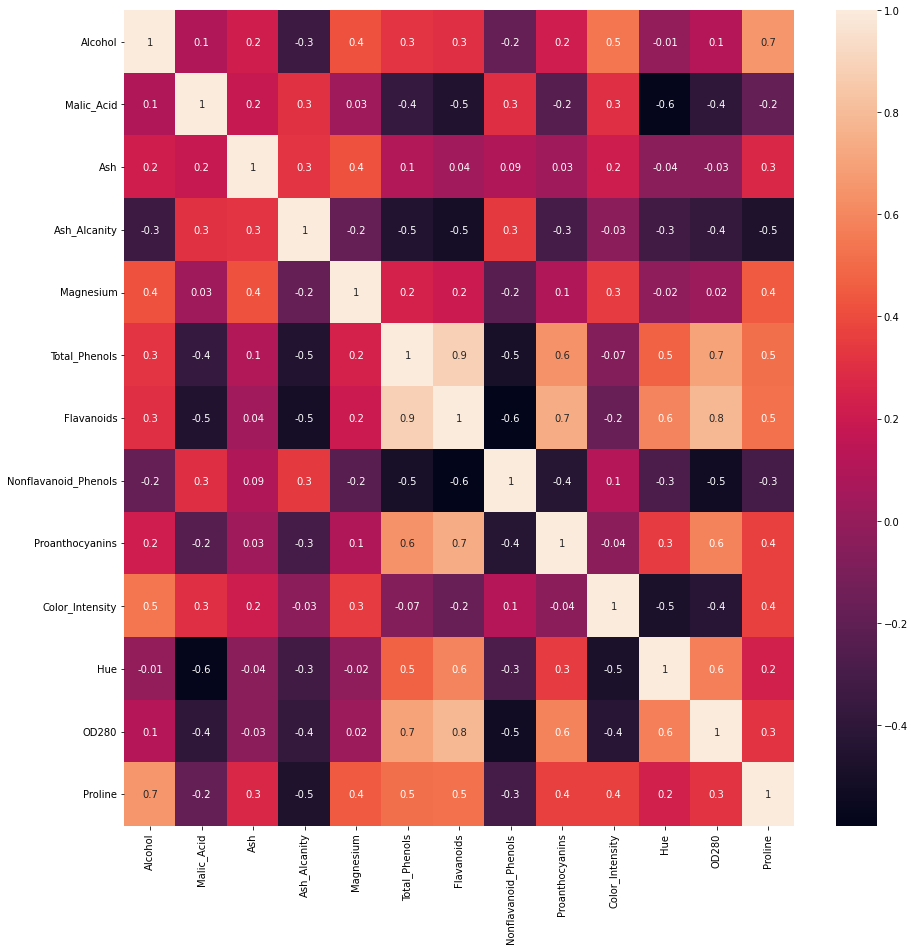

In [ ]:
corr = data_scale.corr()
plt.figure(figsize=(15,15))
sns.heatmap(corr, annot=True, fmt='.1g')

위의 표를 보면 변수 (Falvanoids, Total_Phenois, 0.9)와 같이 변수들 사이에 상관계수가 매우 높은 것이 많이 존재함을 알수 있다. 관측치들 간에 거리를 계산할 시 많은 변수들 간에 다중공선성이 존재한다면 해당 변수들에 더 큰 가중치가 부여되어 다중공선성이 존재하는 변수들의 특징을 더 많이 반영한 군집과학 진행되기에 변수를 제거하거나 차원 축소를 실행한다. 변수를 제거하게되면 정보손실이 발생할 수 있기에 PCA를 사용하여 차원 축소를 하여 다중공선성 문제를 해소하였다. 

# PCA

In [ ]:
!pip install factor_analyzer # https://pypi.org/project/factor-analyzer/

     |████████████████████████████████| 41 kB 458 kB/s 
  Created wheel for factor-analyzer: filename=factor_analyzer-0.4.0-py3-none-any.whl size=41455 sha256=00f07c71cb958100acfdd6f7ebada9332e39d1a364c0bfec48d9b26fc12cfdb8
  Stored in directory: /root/.cache/pip/wheels/ac/00/37/1f0e8a5039f9e9f207c4405bbce0796f07701eb377bfc6cc76
Successfully built factor-analyzer


In [ ]:
import pandas as pd 
import numpy as np
import seaborn as sns
from sklearn.decomposition import PCA

# 필요한 패키지/모듈 가져오기
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
%matplotlib inline

from factor_analyzer import FactorAnalyzer

In [ ]:
# PCA 진행
pca = PCA(random_state=325)
X_p = pca.fit_transform(data_scale)

In [ ]:
# Eigen value 방안 1: Eigen value가 1 이상일 때까지

fa = FactorAnalyzer(n_factors=data_scale.shape[1], rotation=None) # rotation: 
fa.fit(data_scale)

ev, v = fa.get_eigenvalues()
print('eigen value:', ev,'\n')

print('적합한 PC 개수:', sum(ev >= 1))

eigen value: [5.01181234 2.68573211 1.23647504 0.90772792 0.74151477 0.55963304
 0.46028875 0.34460238 0.31102735 0.26102098 0.23245078 0.17269664
 0.07501788] 

적합한 PC 개수: 3


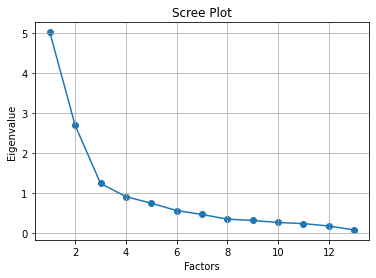

In [ ]:
# 방안 2: Scree plot 그래프 기울기가 완만해지기 전의 값까지

plt.scatter(range(1, data_scale.shape[1]+1),ev)
plt.plot(range(1,data_scale.shape[1]+1),ev)
plt.title('Scree Plot')
plt.xlabel('Factors')
plt.ylabel('Eigenvalue')
plt.grid()
plt.show()

Factors가 2->3 이후 3->4부터 기울기가 완만해진다.

기울기가 완만해지기 전의 값을 찾아야하므로 적합한 PC의 개수는 2개이다.

In [ ]:
# 분산 설명 비율
each_variance_ratio = pca.explained_variance_ratio_
print('분산 설명 비율:\n', each_variance_ratio) # 각 PC별 분산 설명 비율

cumsum = np.cumsum(each_variance_ratio)
print('누적 분산 설명 비율:\n', cumsum) # 고유값을 기준으로 설명 가능한 분산 (누적)

분산 설명 비율:
 [0.38552403 0.20659478 0.09511346 0.06982522 0.0570396  0.0430487
 0.03540683 0.02650788 0.02392518 0.02007854 0.01788083 0.01328436
 0.00577061]
누적 분산 설명 비율:
 [0.38552403 0.5921188  0.68723227 0.75705749 0.81409709 0.85714579
 0.89255261 0.91906049 0.94298567 0.96306421 0.98094504 0.99422939
 1.        ]


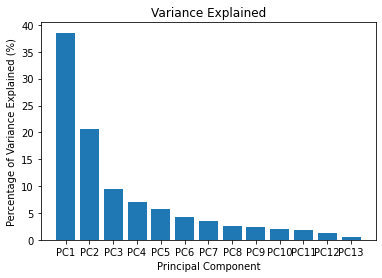

In [ ]:
# 시각화 2
percent_variance = np.round(each_variance_ratio* 100, decimals =2)
columns = []
for i in range(len(percent_variance)):
    columns.append(f'PC{i+1}')

ax = plt.bar(x = range(len(percent_variance)), height=percent_variance, tick_label=columns)
plt.ylabel('Percentage of Variance Explained (%)')
plt.xlabel('Principal Component')
plt.title('Variance Explained')
plt.show()

In [ ]:
d = np.argmax(cumsum >= 0.80) +1 #누적된 설명가능한 분산의 비율이 0.85 이상
print('적합한 PC 개수:', d) # 17개 선택 (PC16까지 활용)

적합한 PC 개수: 5


방안1에서는 3개의 pc개수를 제안하고 방안2에서는 2개의 pc개수를 제안하였다 

방안 3에서는 5개의 pc개수를 제안하기 때문에 차원축소의 의미를 살려 방안3는 고려하지 않았고 

누적분산 설명이 더 높은 방안1을 선택, PC개수를 3개로 결정하였다.

In [ ]:
pca = PCA(n_components=3,random_state=324) # n_components를 재설정
X_p = pca.fit_transform(data_scale)

In [ ]:
# 각 PC를 이루는 변수들의 조합 구성 (23X5): Eigen Vector
pca_df=pd.DataFrame(pca.components_.T, 
             columns = ['PC1','PC2','PC3'], 
             index=data.columns)
pca_df

,PC1,PC2,PC3
Alcohol,-0.171612,-0.448693,-0.180816
Malic_Acid,0.237530,-0.250980,0.070262
Ash,-0.010578,-0.310795,0.704644
Ash_Alcanity,0.274829,0.039114,0.551860
Magnesium,-0.125700,-0.394822,0.183596
Total_Phenols,-0.391267,-0.033281,0.098071
Flavanoids,-0.423775,0.030432,0.072880
Nonflavanoid_Phenols,0.293487,-0.021405,0.054221
Proanthocyanins,-0.324259,0.001364,0.091376
Color_Intensity,0.064950,-0.508074,-0.234709


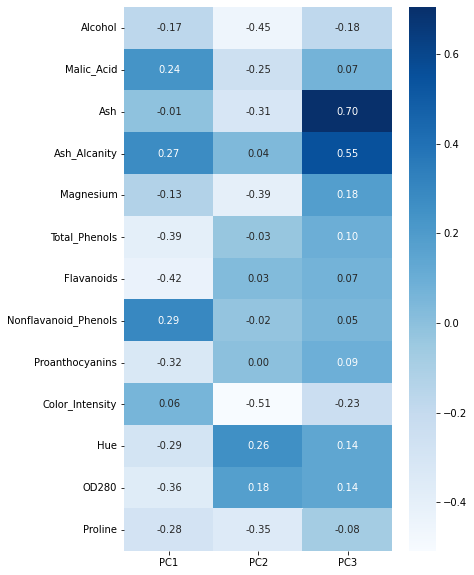

In [ ]:
plt.figure(figsize=(6,10))
sns.heatmap(pca_df, cmap="Blues", annot=True, fmt='.2f')

변수를 다시 정리하자면


*   Alcohol: 알코올 도수
*   Malic acid :신맛
*   Ash : 잔류물 (와인의 포도 등의 잔류물) 
*   Alcalinity of ash: 와인의 양이온과 유기산의 합 (상쾌하고 청량한)
*   Magnesium: 쓴 맛
*   Total phenols: 향긋한 냄새, 떫지 않은 맛
*   Flavanoids: 떫은 맛
*   Nonflavanoid phenols: 떫지 않은 맛
*   Proanthocyanins:떫은 맛
*  Color intensity: 색의 농도
*   Hue: 와인과 글라스의 경계 부분의 색깔이 다른 정도
*  OD280/OD315 of diluted wines: 희석된 정도
*   Proline: 아미노산 성분으로. 단맛













PC1: - Totlal_Phenols(페놀, 향긋한 냄새,떫지 않음), - Flavanoids (떫지 않은 맛),   + NonFlavanoids_Phenols (떫지 않은 맛), -Proanthocyanins ( 떫지 않은 맛),  관련 주성분,

결국 PC1은 떫지않은 맛을 가지는 주성분이다.


PC2: - Alcohol(알코올농도),-Magnesium(마그네슘, 쓰지 않은맛) , , -Color_Intensity(연한 색)  관련 주성분

결국 PC2는 저알코올이며 쓰지않고 연한 색을 가지는 주성분이다.



PC3: Ash(회분, 잔류양), Ash_Alcanity(회분의 알칼리도, 상쾌하고 청량한)  관련 주성분

결국 PC3는 잔여물이 많고 청량함을 가지는 주성분이다.


In [ ]:
np.cumsum(pca.explained_variance_ratio_) #방안 1의 누적설명분산은 약 68퍼센트

array([0.38552403, 0.5921188 , 0.68723227])

In [ ]:
X_pp = pd.DataFrame(X_p, 
                    columns = ['PC1','PC2','PC3'], 
                    index =data.index)

X_pp # PCA 이후 만들어진 data (PC1~ PC4로 총 4개 변수로 축소)

,PC1,PC2,PC3
0,-3.503528,-1.609446,0.039412
1,-2.342642,0.331164,-1.978331
2,-2.661349,-0.936183,1.126533
3,-3.925301,-2.710827,-0.146296
4,-1.032831,-1.074396,2.445841
...,...,...,...
172,2.405826,-2.242187,-0.990173
174,2.642860,-1.932660,0.310455
175,2.656031,-3.179693,-1.026259
176,2.354087,-2.646939,-0.606445


In [ ]:
from sklearn.preprocessing import StandardScaler
scaled = StandardScaler().fit_transform(X_pp)

In [ ]:
scaled = pd.DataFrame(scaled, columns =X_pp.columns)
scaled.describe() # 기초통계량

,PC1,PC2,PC3
count,1.610000e+02,1.610000e+02,1.610000e+02
mean,7.861207e-17,-4.689141e-17,7.585375e-18
std,1.003120e+00,1.003120e+00,1.003120e+00
min,-1.753378e+00,-1.940233e+00,-2.398440e+00
25%,-9.432236e-01,-7.361154e-01,-6.973791e-01
50%,-3.958944e-03,-2.505396e-01,-9.575785e-02
75%,9.992687e-01,9.211246e-01,7.528870e-01
max,1.935616e+00,2.169696e+00,2.959194e+00


# 계층적 클러스터링

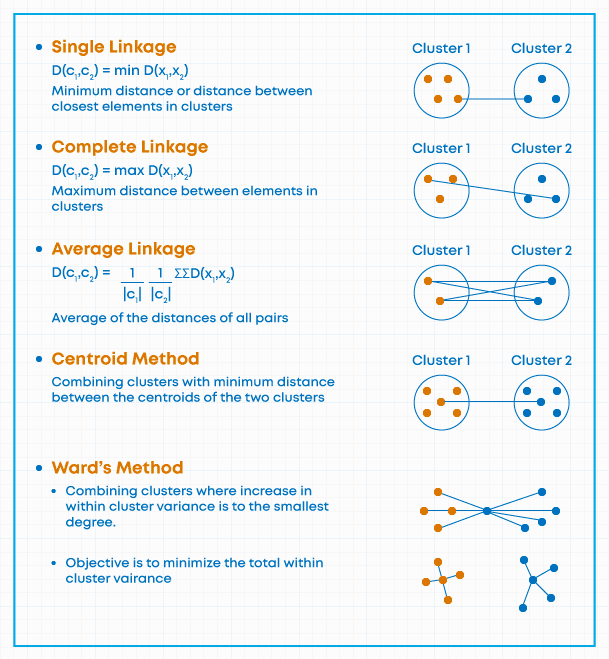

https://dataaspirant.com/hierarchical-clustering-algorithm/

In [ ]:
data_prime = scaled.copy()

## Step 1. 군집 수 결정
- 덴드로그램 (dendrogram): 각 단계에서 군집이 어떻게 형성되는지 확인하고 형성된 군집의 유사성(또는 거리) 수준을 평가  
  - 덴드로그램을 더 높게 커팅할수록 최종 군집 수는 더 작지만 유사성 수준은 더 낮아짐
  - 덴드로그램을 더 낮게 커팅할수록 유사성 수준은 더 높지만 최종 군집 수는 더 많아짐
  - 일부 데이터 집합의 경우 평균, 중심, 중위수 및 Ward의 연결 방법으로 계층적 덴드로그램이 생성되지 않음. (결합 거리가 각 단계에서 항상 증가하지 않을 수 있음)

scipy.cluster.hierarchy의 linkage를사용하고 , 거리 계산에 따른 클러스터링을 진행한다

In [ ]:
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster
from sklearn.metrics import silhouette_samples, silhouette_score

fcluster을 사용하여 덴드로그램 결과에 기반한 clustering을 진행한다 . 

In [ ]:
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster
from sklearn.metrics import silhouette_samples, silhouette_score

Silhouette Average Score:0.255
Silhouette Average Score:0.334
Silhouette Average Score:0.340
Silhouette Average Score:0.201


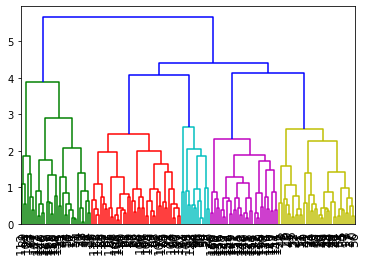

In [ ]:
cluster_com = linkage(y=data_prime, method='complete', metric='euclidean')
dendrogram(cluster_com, leaf_rotation=90, leaf_font_size=12,)
for i in [2,3,4,5]:
    cut_tree = fcluster(cluster_com, t= i, criterion='distance')
    average_score = silhouette_score(data_prime, cut_tree)
    print('Silhouette Average Score:{0:.3f}'.format(average_score))

최장연결법의 경우 댄드로그램의 t=4를 기준으로 잘랐을 때 

군집간 높이차이가 크기 때문에 적절한 군집의 개수가 나올것으로 예상한다.

또한 Silhouette 스코어는 개체별로 적합성을 평가하여 유효성을 검증하는데 해당 개체와 내부와의 거리가 짧고 개체와 외부와의 거리가 크면 Silhoutte 값이 커진다.

최장연결법에서는 t = 2,3,4,5 에서 잘랐을때 4에서 가장 Silhouette score가 높았으므로 t=4에서 잘라주었다.

In [ ]:
cut_tree_com = fcluster(cluster_com, t=4, criterion='distance')
cut_tree_com

array([5, 5, 1, 5, 1, 5, 5, 1, 5, 5, 5, 5, 5, 5, 1, 1, 1, 5, 5, 5, 1, 5,
       2, 2, 5, 3, 1, 5, 1, 5, 5, 1, 1, 5, 1, 5, 3, 5, 5, 5, 5, 5, 5, 1,
       5, 5, 5, 5, 5, 5, 5, 1, 5, 1, 5, 1, 5, 2, 3, 3, 2, 2, 2, 3, 3, 4,
       2, 1, 2, 2, 3, 3, 2, 1, 2, 2, 2, 4, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2,
       2, 1, 3, 2, 2, 3, 3, 2, 3, 2, 2, 2, 2, 2, 1, 2, 1, 2, 2, 2, 2, 3,
       2, 2, 1, 2, 2, 2, 2, 2, 4, 4, 4, 4, 3, 4, 4, 4, 1, 1, 4, 1, 4, 4,
       4, 4, 4, 4, 4, 1, 1, 4, 4, 4, 4, 1, 4, 4, 1, 4, 4, 4, 1, 4, 1, 1,
       4, 4, 4, 4, 4, 4, 1], dtype=int32)

In [ ]:
pd.Series(cut_tree_com).value_counts()

2    43
5    37
1    34
4    33
3    14
dtype: int64

t= 4일때 최장연결법의 군집개수는 5개이다

Silhouette Average Score:0.336
Silhouette Average Score:0.363
Silhouette Average Score:0.391


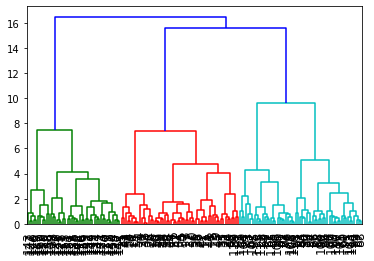

In [ ]:
clusters = linkage(y=data_prime, method='ward', metric='euclidean')
dendrogram(clusters, leaf_rotation=90, leaf_font_size=12,)
for i in [7,8,15]:
    cut_tree = fcluster(clusters, t= i, criterion='distance')
    average_score = silhouette_score(data_prime, cut_tree)
    print('Silhouette Average Score:{0:.3f}'.format(average_score))

와드연결법의 경우 댄드로그램의 t=15를 기준으로 잘랐을 때 

군집간 높이차이가 크기 때문에 적절한 군집의 개수가 나올것으로 예상한다.

또한 Silhouette 스코어는 개체별로 적합성을 평가하여 유효성을 검증하는데 해당 개체와 내부와의 거리가 짧고 개체와 외부와의 거리가 크면 Silhoutte 값이 커진다.

최장연결법에서는 t = 7,8,15 에서 잘랐을때 15에서 가장 Silhouette score가 높았으므로 t=15에서 잘라주었다.

In [ ]:
cut_tree = fcluster(clusters, t=15, criterion='distance')
cut_tree

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       3, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 1, 3, 3, 3, 3, 3, 3, 2,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 1, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 1,
       3, 3, 3, 3, 3, 3, 3, 3, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1], dtype=int32)

In [ ]:
pd.Series(cut_tree).value_counts()

3    59
2    57
1    45
dtype: int64




t=15일때 와드연결법의 군집개수는 3개이다 

### PCA 군집수 결정 보충

또한 Silhouette score가 의사결정을 도와주는 metric이기에 항상 best군집화는 아니지만 우선적으로 고려할 수 있어 아래의 다른 metric들은 모두 ward나 complete에 미치지 못하여 고려해주지 않았다.

또한 군집을 그림으로 보아도 

* centroid의 경우에는 하늘색 부분은 많이 군집되고 초록색과 주황색 
부분은 적게 군집되므로 고려하지 않았다
* single 역시 분홍색이 군집의 대다수를 차지하고 나머지부분은 매우 소수로 군집되므로 고려하지 않았다.
* average 는 모양상으로 complete와 비슷하여 문제 없으나 Shilhouette score가 ward 보다 낮아 고려하지 않았다.

Silhouette Average Score:0.135
Silhouette Average Score:0.092
Silhouette Average Score:0.018


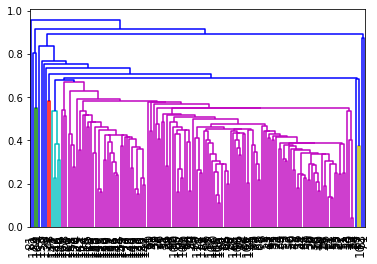

In [ ]:
cluster_s = linkage(y=data_prime, method='single', metric='euclidean')
dendrogram(cluster_s, leaf_rotation=90, leaf_font_size=12,)
for i in [0.3,0.38,0.45]:
    cut_tree_s = fcluster(cluster_s, t= i, criterion='distance')
    average_score_s = silhouette_score(data_prime, cut_tree_s)
    print('Silhouette Average Score:{0:.3f}'.format(average_score_s))

Silhouette Average Score:0.334
Silhouette Average Score:0.202
Silhouette Average Score:0.101


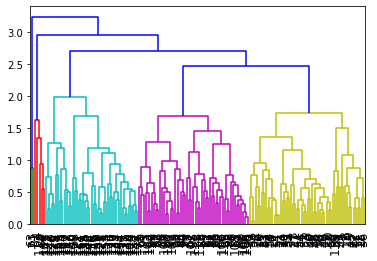

In [ ]:
cluster_av = linkage(y=data_prime, method='average', metric='euclidean')
dendrogram(cluster_av, leaf_rotation=90, leaf_font_size=12,)
for i in [2,2.5,2.8]:
    cut_tree_av = fcluster(cluster_av, t= i, criterion='distance')
    average_score_av = silhouette_score(data_prime, cut_tree_av)
    print('Silhouette Average Score:{0:.3f}'.format(average_score_av))

Silhouette Average Score:0.276
Silhouette Average Score:0.249
Silhouette Average Score:0.335


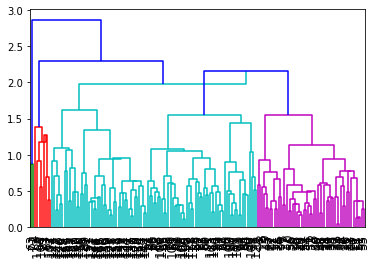

In [ ]:
cluster_cen = linkage(y=data_prime, method='centroid', metric='euclidean')
dendrogram(cluster_cen, leaf_rotation=90, leaf_font_size=12,)
for i in [1,1.25,1.75]:
    cut_tree_cen = fcluster(cluster_cen, t= i, criterion='distance')
    average_score_cen  = silhouette_score(data_prime, cut_tree_cen)
    print('Silhouette Average Score:{0:.3f}'.format(average_score_cen))

## Step 2. Evaluation
군집 내 비유사성 (within dissimilarities)는 작고 군집 간 비유사성 (between dissimilarities)는 크도록 생성


Silhouette coefficient (실루엣 계수)는 각 관측치와 주위 관측치과의 거리 계산을 통해 군집 내 비유사성과 군집 간 비유사성의 정도를 평가

1. 전체 실루엣 계수(0~1)의 평균값이 1에 가까울수록 클러스터링이 잘 진행된 것  

|Range of SC|Interpretation|
|:------:|:---------------:|
|0.71-1.0|A strong structure has been found|
|0.51-0.70|A reasonable structure has been found|
|0.26-0.50|The structure is weak and could be artificial|
|< 0.25|No substantial structure has been found|

2. 개별 클러스터의 실루엣 계수 평균값의 편차가 작아야 함
  - 클러스터 내 실루엣 계수 평균값을 확인하여, 1에 가까운 클러스터를 'clear-cut cluster', 0에 가까운 클러스터를 'weak cluster'로 표현

In [ ]:
from sklearn.metrics import silhouette_samples, silhouette_score
score_samples_com = silhouette_samples(data_prime, cut_tree_com)
print('Silhouette Score:', score_samples_com[:3], '\nSilhouette Score shape:', score_samples_com.shape, '\n')

average_score_com = silhouette_score(data_prime, cut_tree_com)
# np.mean(score_samples) == average_score: True
print('Silhouette Average Score:{0:.3f}'.format(average_score_com))

Silhouette Score: [ 0.54577113 -0.00817211 -0.02431919] 
Silhouette Score shape: (161,) 

Silhouette Average Score:0.340


In [ ]:
from sklearn.metrics import silhouette_samples, silhouette_score
score_samples = silhouette_samples(data_prime, cut_tree)
print('Silhouette Score:', score_samples[:3], '\nSilhouette Score shape:', score_samples.shape, '\n')

average_score = silhouette_score(data_prime, cut_tree)
# np.mean(score_samples) == average_score: True
print('Silhouette Average Score:{0:.3f}'.format(average_score))

Silhouette Score: [0.6011346  0.24935353 0.42450641] 
Silhouette Score shape: (161,) 

Silhouette Average Score:0.391


와드연결법의 실루엣계수의 평균값이 0.391로 최장연결법보다 높기 때문에 


와드연결법을 사용, 군집개수는 3개로 결정한다.



In [ ]:
data_prime['hc_cluster'] = cut_tree
data_prime['silhouette_coeff'] = score_samples
data_prime

,PC1,PC2,PC3,hc_cluster,silhouette_coeff
0,-1.564978,-0.982076,0.035443,2,0.601135
1,-1.046426,0.202075,-1.779124,2,0.249354
2,-1.188788,-0.571254,1.013098,2,0.424506
3,-1.753378,-1.654133,-0.131565,2,0.523903
4,-0.461352,-0.655591,2.199558,2,0.118476
...,...,...,...,...,...
156,1.074649,-1.368171,-0.890468,1,0.478468
157,1.180529,-1.179300,0.279194,1,0.496393
158,1.186413,-1.940233,-0.922920,1,0.411044
159,1.051538,-1.615149,-0.545379,1,0.454458


In [ ]:
# 군집별 평균 silhouette_score 값
print(data_prime.groupby('hc_cluster')['silhouette_coeff'].mean())
print('표준편차:', data_prime.groupby('hc_cluster')['silhouette_coeff'].mean().std())

hc_cluster
1    0.430145
2    0.428571
3    0.324442
Name: silhouette_coeff, dtype: float64
표준편차: 0.060578582396216024


전체 실루엣 계수로 분석했을 경우에는 0.5에 못미쳤기때문에 클러스터링이 weak 하지만

개별 클러스터간 실루엣 계수의 평균값의 편차로 분석했을경우에는 0.05로 


작았기때문에 클러스터링이 잘 이루어졌다고 할 수 있다.

데이터를 PC 3개로 주성분 분석한 현 데이터에서 실루엣 계수가 0.5를 넘을 수 

없었기 때문에 PC 2개로 주성분한 데이터를 클러스터링한 결과를 추후 덧붙이기로 한다 



산점도를 통해 군집분석이 잘 진행되었는지, 각 군집의 특징은 무엇인지 추가해석 한다.

In [ ]:
cluster_g = data_prime.groupby('hc_cluster')

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

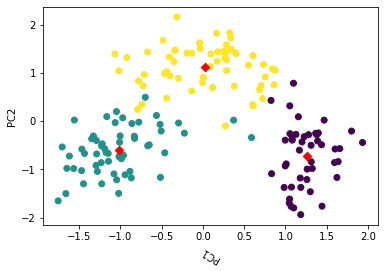

In [ ]:
plt.scatter(x=data_prime['PC1'], y=data_prime['PC2'], c=data_prime['hc_cluster']) # 각 cluster 좌푯값 시각화

hc_centers = np.array(cluster_g.mean()) # 각 cluster별 centroid
plt.scatter(x=hc_centers[:,0], y=hc_centers[:,1], marker='D', c='r') # 각 cluster별 centroid 시각화
# marker='D', c='r' : 마커 모양은 Diamond, 색깔은 red
plt.xlabel('PC1', rotation=150)
plt.ylabel('PC2')
plt.show()

클러스터1: 보라색

클러스터2: 하늘색


클러스터3: 노란색

PC1 PC2로 나타낸 산점도에 각 군집들이 적절하게 군집화가 되어있다 .

보라색 클러스터는 클러스터1이다. 

클러스터1은 PC1이 큰 걸로 보아   <-Totlal_Phenols ,-Flavanoids , NonFlavanoids_Phenols , -Proanthocyanins >떫지 않은 맛을 표현하는 4개의 수치가 높다고 할 수있다


즉 클러스터1의 와인은 떫지 않은 특징을 가지고 있다.

또한 PC2가 낮은 것으로 보아, -Alcohol(알코올 농도)가  낮고  -Magnesium(마그네슘,쓰지 않은맛)도 낮으며 -Color_Intensity(연한색)가 낮다고 할 수 있다. 따라서 알코올 농도가 높고 쓴 맛을 가지며 색이 짙다고 할 수 있다.

즉 클러스터 1의 와인은 고알코올의 쓴맛을 가지며 짙은 색인 특징을 가지고 있다



하늘색 클러스터는 클러스터2이다.

클러스터2는 PC1이 작은걸로 보아   <-Totlal_Phenols ,-Flavanoids , NonFlavanoids_Phenols , -Proanthocyanins >떫지 않은 맛을 표현하는 4개의 수치가 낮고 할 수있다. 

즉 클러스터2의 와인은 떫은 특징을 가지고 있다

또한 PC2가 낮은 것으로 보아, -Alcohol(알코올 농도)가  낮고  -Magnesium(마그네슘,쓰지 않은맛)도 낮으며 -Color_Intensity(연한색)가 낮다고 할 수 있다. 따라서 알코올 농도가 높고 쓴 맛을 가지며 색이 짙다고 할 수 있다.

즉 클러스터 2의 와인은 고알코올의 쓴맛을 가지며 짙은 색인 특징을 가지고 있다.

노란색 클러스터는 클러스터3이다.

클러스터3는 PC1 값에 관계없이 군집화가 되어있으므로 PC1과 상관관계가 크게 있지 않다고 해석 할 수 있다 

또한 PC2가 높은 것으로 보아, -Alcohol(알코올 농도)가  높고  -Magnesium(마그네슘,쓰지 않은맛)도 높으며 -Color_Intensity(연한색)가 높다고 할 수 있다. 따라서 알코올 농도가 낮고 쓰지 않은맛을 가지며 색이 연하다고 할 수 있다.

즉 클러스터 3의 와인은 저알코올의 쓰지 않은 맛을 가지며 옅은 색인 특징을 가지고 있다

PC2가 클러스터 1,2와 클러스터 3을 나누는 주성분으로

PC1이 클러스터 1과 클러스터 2를 나누는 주성분으로 해석할 수 있다.

.


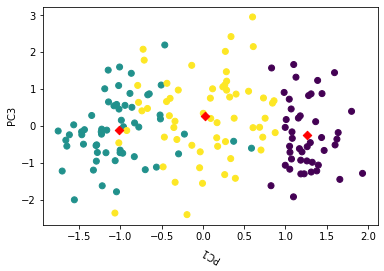

In [ ]:
plt.scatter(x=data_prime['PC1'], y=data_prime['PC3'], c=data_prime['hc_cluster']) # 각 cluster 좌푯값 시각화

hc_centers = np.array(cluster_g.mean()) # 각 cluster별 centroid
plt.scatter(x=hc_centers[:,0], y=hc_centers[:,2], marker='D', c='r') # 각 cluster별 centroid 시각화
# marker='D', c='r' : 마커 모양은 Diamond, 색깔은 red
plt.xlabel('PC1', rotation=150)
plt.ylabel('PC3')
plt.show()

클러스터 1,2,3 모두 PC1과 PC3로 나타낸 산점도에 적절하게 군집화 되어있다.


앞에서 말햇듯이 클러스터3는 PC1 값에 관계없이 군집화가 되어있으므로 PC1과 상관관계가 크게 있지 않고,

 PC1은 클러스터 1,2를 나누는 주성분이라고 해석할 수 있다. 

 클러스터 1,2,3 모두 PC3 값에 관계없이 군집화가 되어있으므로 PC3는 군집의 특징과

 관계가 없다고 해석할 수 있다 . 즉 와인들을 군집분석 할때 PC3의 주요 특징인 청량함은 고려되지 않는다고 해석할 수 있다.

 
(주성분 분석에서 PC를 2개로 한 추가 클러스터링 해석이 필요하다)



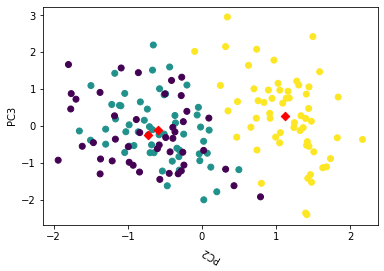

In [ ]:
plt.scatter(x=data_prime['PC2'], y=data_prime['PC3'], c=data_prime['hc_cluster']) # 각 cluster 좌푯값 시각화

hc_centers = np.array(cluster_g.mean()) # 각 cluster별 centroid
plt.scatter(x=hc_centers[:,1], y=hc_centers[:,2], marker='D', c='r') # 각 cluster별 centroid 시각화
# marker='D', c='r' : 마커 모양은 Diamond, 색깔은 red
plt.xlabel('PC2', rotation=150)
plt.ylabel('PC3')
plt.show()

PC2와 PC3로 나타낸 산점도에는 적절하게 군집화 되어 있지 않다



이는 PC2가 높다 낮다로 클러스터1,클러스터2와 클러스터3를 구분 할 수 있지만

PC2가 낮다는 특징을 클러스터 1,2가 모두 갖고있고 PC3는 군집의 특징과 관련이 없기 때문에 클러스터 1,2의 구분이 잘 되지 않는다고 해석된다 .

이 결과 역시 주성분 분석에서 PC를 2개로 한 추가 클러스터링 해석이 필요함을 시사한다


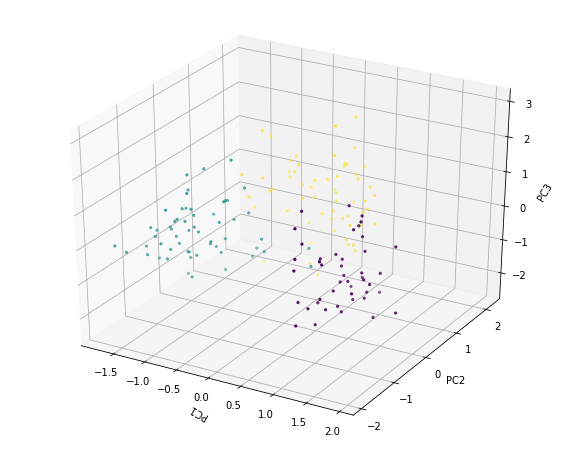

In [ ]:
fig = plt.figure(figsize=(10,8))
ax = fig.gca(projection = '3d')

ax.scatter(data_prime['PC1'], data_prime['PC2'], data_prime['PC3'], s=5, c = data_prime['hc_cluster'])
ax.set_xlabel('PC1', rotation=150)
ax.set_ylabel('PC2')
ax.set_zlabel(r'PC3', rotation=60)
plt.show()

PC1, PC2 ,PC3 3차원으로 이루어진 산점도를 봤을때는 PC3에 관계없이 

PC1과 PC2가 각 군집들을 잘 나누어주고 있기 때문에 적절하게 군집화가 되어있다고 해석할 수 있다 .

## Step 3. EDA/Interpretation

In [ ]:
# 군집별 통계(평균)
cluster_g.mean()

,PC1,PC2,PC3,silhouette_coeff
hc_cluster,,,,
1,1.258579,-0.727411,-0.249899,0.430145
2,-1.020826,-0.591297,-0.091542,0.428571
3,0.026289,1.126059,0.279040,0.324442


In [ ]:
# 군집별 통계(표준편차)
cluster_g.std()

,PC1,PC2,PC3,silhouette_coeff
hc_cluster,,,,
1,0.246044,0.637076,0.937926,0.125091
2,0.459927,0.480964,0.866169,0.186750
3,0.521436,0.447895,1.117241,0.154639


- Cluster1: 고알코올의 떫지않은 맛과 쓴 맛을가지며 짙은색인 와인 

- Cluster2: 고알코올의 떫은 맛과 쓴 맛을가지며 짙은색인 와인

- Cluster3: 저알코올의 쓰지 하지 않은 맛을 가지며 옅은 색인 와인


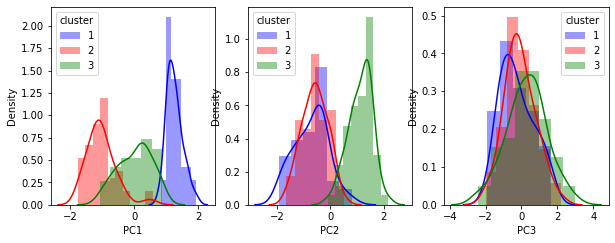

In [ ]:
# 시각화방법 1
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10,8)) 
plt.subplot(2,3,1) 
sns.distplot(data_prime[data_prime.hc_cluster == 1]["PC1"], 
             color="blue", label=1)
sns.distplot(data_prime[data_prime.hc_cluster == 2]["PC1"], 
             color="red", label=2)
sns.distplot(data_prime[data_prime.hc_cluster == 3]["PC1"], 
             color="green", label=3)
plt.legend(title="cluster")


plt.subplot(2,3,2) 
sns.distplot(data_prime[data_prime.hc_cluster == 1]["PC2"], 
             color="blue", label=1)
sns.distplot(data_prime[data_prime.hc_cluster == 2]["PC2"], 
             color="red", label=2)
sns.distplot(data_prime[data_prime.hc_cluster == 3]["PC2"], 
             color="green", label=3)
plt.legend(title="cluster")


plt.subplot(2,3,3)
sns.distplot(data_prime[data_prime.hc_cluster == 1]["PC3"], 
             color="blue", label=1)
sns.distplot(data_prime[data_prime.hc_cluster == 2]["PC3"], 
             color="red", label=2)
sns.distplot(data_prime[data_prime.hc_cluster == 3]["PC3"], 
             color="green", label=3)
plt.legend(title="cluster")


plt.show()

Plot에서도 앞에서 했던 해석과 같이

PC1이 클러스터1(떫지않은특징을 가짐)과 클러스터2(떫은 특징을 가짐)를 나누는 기준이 되고 클러스터1이 PC1이 가장 크다.

(PC1의 주요 변수들이 떫지 않은 맛을 결정하기 때문이다)

PC2가 클러스터 1,2(고알코올 와인)과 클러스터3(저알코올 와인)을 나누는 기준이 되고 클러스터3가 PC2가 가장 크다.

(PC2의 주요 변수인 -Alcohol이 알코올 농도를 결정하기 때문이다)

PC3는 세 군집의 와인들과 크게 상관관계가 없었다. 

(PC3의 주요 변수인 Ash가 청량함을 뜻하는데 진행한 군집분석에서 청량함이 군집을 나누는데 영향을 주지 못했기 때문이다)

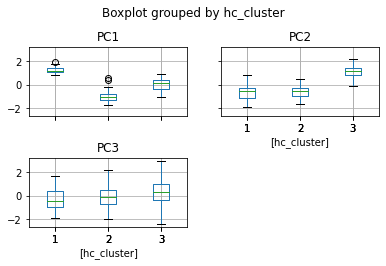

<Figure size 1440x1440 with 0 Axes>

In [ ]:
# 시각화방법 2
import matplotlib.pyplot as plt
data_prime.drop('silhouette_coeff', axis=1).boxplot(by='hc_cluster')
plt.tight_layout(pad=3, h_pad=1)
plt.figure(figsize=(20,20)) 
plt.show()

첫 번째 Plot에서 PC1에 따라 클러스터 1,2가 나누어진다

두 번째 Plot에서 PC2에 따라 클러스터 1,2와 클러스터 3이 나누어진다


세 번째 Plot에서 PC3가 와인들(군집)의 종류에 관계없이 비슷한 것을 한 눈에 확인할 수 있다.

나머지 해석은 위와 동일하다.

No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.


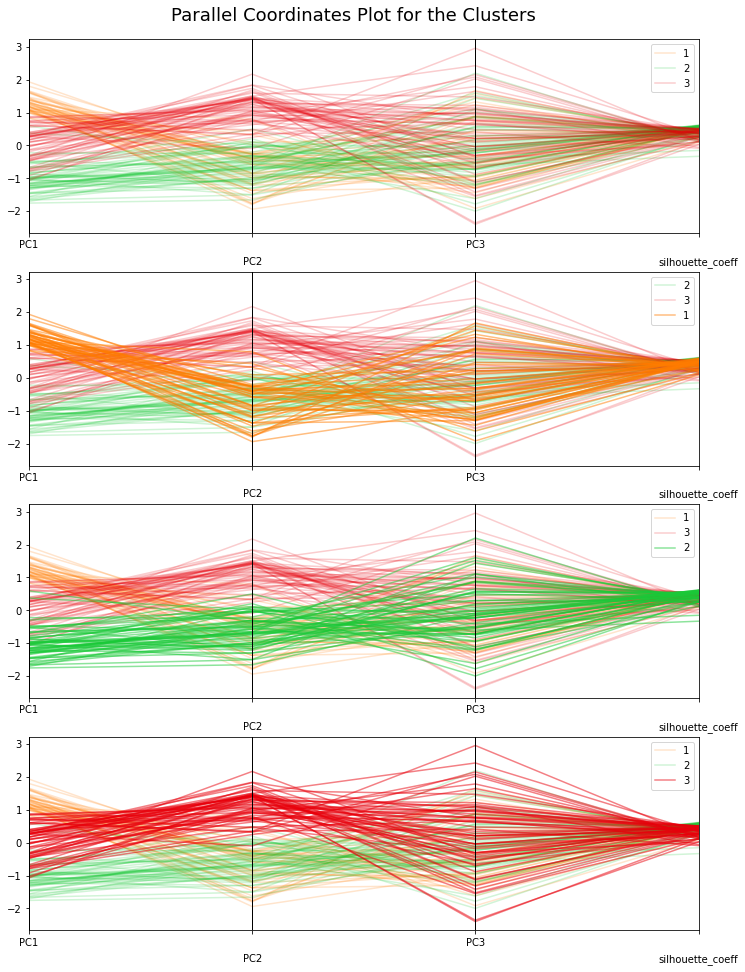

In [ ]:
# Display parallel coordinates plots, one for each cluster
'''https://github.com/OpenClassrooms-Student-Center/Multivariate-Exploratory-Analysis/blob/master/3b.%20Hierarchical%20Clustering.ipynb'''
import matplotlib.pyplot as plt
from pandas.plotting import parallel_coordinates
import seaborn as sns
palette = sns.color_palette("bright", 10)

def display_parallel_coordinates(df, num_clusters):
    '''Display a parallel coordinates plot for the clusters in df'''

    def addAlpha(colour, alpha):
        '''Add an alpha to the RGB colour'''
        
        return (colour[0],colour[1],colour[2],alpha)

    # Select data points for individual clusters
    cluster_points = []
    for i in range(num_clusters):
        cluster_points.append(df[df.hc_cluster==i])
    
    # Create the plot
    fig = plt.figure(figsize=(12, 15))
    title = fig.suptitle("Parallel Coordinates Plot for the Clusters", fontsize=18)
    fig.subplots_adjust(top=0.95, wspace=0)

    # Display one plot for each cluster, with the lines for the main cluster appearing over the lines for the other clusters
    for i in range(num_clusters):    
        plt.subplot(num_clusters, 1, i+1)
        for j,c in enumerate(cluster_points): 
            if i!= j:
                pc = parallel_coordinates(c, 'hc_cluster', color=[addAlpha(palette[j],0.2)])
        pc = parallel_coordinates(cluster_points[i], 'hc_cluster', color=[addAlpha(palette[i],0.5)])

        # Stagger the axes
        ax=plt.gca()
        for tick in ax.xaxis.get_major_ticks()[1::2]:
            tick.set_pad(20)        

display_parallel_coordinates(data_prime, 4) # cluster 0 포함 개수

두 번째 Plot을 볼때 클러스터1이 PC1이 크고 PC2가 작고 PC3에서는 별 특징을 보이지 않는다

세 번째 Plot을 볼 때 클러스터2는 PC1이 작고 PC2도 작으며 PC3에서는 별 특징을 보이지 않는다.

네 번째 Plot을 볼 때 클러스터3는 PC1에서는 별 특징을 보이지 않고 PC2가 크며 PC3에서도 별 특징을 보이지 않는다.

나머지 해석은 위와 동일하다.



# k-평균 클러스터링 (K-means Clustering)
- Euclidean space를 가정
- [과정](https://eunsukimme.github.io/ml/2019/12/16/K-Means/)  
  1) 클러스터의 개수 k를 선정  
  2) 데이터셋에서 k개의 centroids를 임의로 지정  
  3) 각 데이터들을 가장 가까운 centroids가 속한 그룹에 할당  
  4) 각 클러스터의 centroids 다시 계산 (일반적으로 유클리드 거리 사용)  
  5) 3, 4번 과정을 centroids가 더 이상 변하지 않을 때까지/지정된 횟수까지 반복  

- [한계](https://medium.com/h-document/%ED%81%B4%EB%9F%AC%EC%8A%A4%ED%84%B0%EB%A7%81-%EA%B5%B0%EC%A7%91-%EB%B6%84%EC%84%9D-%EB%B9%84-%EA%B3%84%EC%B8%B5%EC%A0%81-%EA%B5%B0%EC%A7%91-%EB%B6%84%EC%84%9D-ef1a96948d7d)
  - K 결정이 주관적
  - 여러 초기값이 동일 군집에 존재할 경우 최종 결과가 이상해질 수 있음
  - 크기가 작은 그룹에서는 제대로 작동하지 않을 수 있음
  - 반복 특성과 centroid를 random하게 초기화하기 때문에 local optimum에 고착, global optimum에 수렴되지 않을 수 있음

- Extensions
    - k-means에서 initial points로 비슷한 점들이 여러 개 선택되는 경우 불안정한 군집을 학습하게 됨 ([자세한 과정](https://lovit.github.io/nlp/machine%20learning/2018/03/19/kmeans_initializer/))
    - `k-means++`: 1) 첫 initial point를 임의로 선택, 2) 이후의 initial points는 과거 initial points와 멀리 떨어지도록 분포를 조절하여 진행
        - 문서의 bag of words와 같이, 고차원의 sparse 데이터를 군집화하는 과정에서, 대부분의 데이터 간 거리가 유사할 경우 k-means++를 적용하는 것은 expensive한 버전의 random sampling을 수행하는 것과 같음
    - `SphericalKMeans`: k-means++가 가지는 한계를 완화하기 위해 등장. 2)에서 다음 initial points가 멀리 떨어지도록 조절하는 과정에서 거리가 threshold 이하인 점들을 제거 후 random하게 initial points 선택
    - k-medoid: 임의의 점으로 초기화하는 kmeans와 달리 특정 점을 medoid로 사용  
      - large data에 잘 먹지 않을 수 있음
    - fuzzy c-means clustering (soft clustering)


In [ ]:
data_prime = scaled.copy()

## Step 1. K 선정
1. EDA: 데이터의 형태를 살펴보고 manually 결정  
2. Elbow method: 클러스터의 개수를 늘려가며 SSE를 계산, SSE가 줄어드는 비율이 급격히 작아지는 부분을 elbow라 설정  
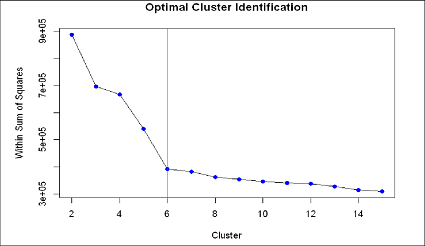
3. Silhouette score
4. Calinski Harabasz score: Variance Ratio Criterio이라고도 알려짐. between-clusters dispersion mean 과 within-cluster dispersion의 비율. 값이 높을수록 군집화가 잘 되었음을 의미
- 기타 지표 [참고](https://hongl.tistory.com/161)

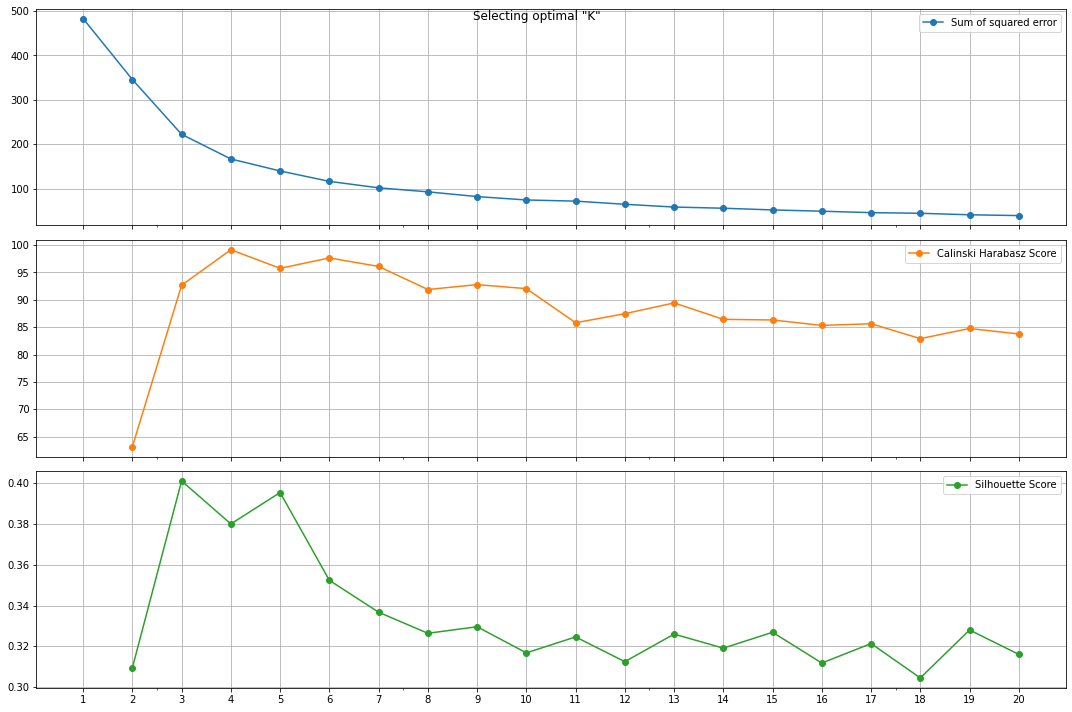

In [ ]:
from sklearn.cluster import KMeans
from sklearn.metrics import calinski_harabasz_score, silhouette_score

import seaborn as sns
import matplotlib.pyplot as plt

search_range = range(1, 21)
report = {}
for k in search_range:
    temp_dict = {}
    kmeans = KMeans(init='k-means++',
                    algorithm='auto',
                    n_clusters=k,
                    max_iter=1000,
                    random_state=1,
                    verbose=0).fit(data_prime)
    inertia = kmeans.inertia_
    temp_dict['Sum of squared error'] = inertia
    try:
        cluster = kmeans.predict(data_prime)
        chs = calinski_harabasz_score(data_prime, cluster)
        ss = silhouette_score(data_prime, cluster)
        temp_dict['Calinski Harabasz Score'] = chs
        temp_dict['Silhouette Score'] = ss
        report[k] = temp_dict
    except:
        report[k] = temp_dict

report_df = pd.DataFrame(report).T
report_df.plot(figsize=(15, 10),
               xticks=search_range,
               grid=True,
               title=f'Selecting optimal "K"',
               subplots=True,
               marker='o',
               sharex=True)
plt.tight_layout()



*   엘보우 기법

SSE 가 급격히 작아지는 부분이 k=3부터 이므로 k=3 으로 선정함

*   실루엣 기법

실루엣 계수가 1에 가까워질수록 클러스터의 개수가 최적화된 것이므로 실루엣 계수가 가장 큰 k=3 으로 선정함

*  Calinski Harabasz score:  값이 높을수록 군집화가 잘 되었음을 의미 해당 경우는 4에서 가장 높게 나옴

3기법을 모두 종합하였을때 엘보우와 실루엣이 공통적으로 k=3이 나왔으므로 k값을 3으로 정하였음




## Step 2. K-means clustering

In [ ]:
from sklearn.cluster import KMeans
'''
init: {'k-means++', 'random'}, default='k-means++'
algorithm: {'auto', 'full', 'elkan'}, default='auto'
'''

model = KMeans(n_clusters=3, random_state=312, algorithm='auto')
model.fit(data_prime)

KMeans(n_clusters=3, random_state=312)

In [ ]:
# 각 군집(cluster) 표시
pred = model.predict(data_prime)
pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 1, 2, 2, 2, 2, 2, 2, 1,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1,
       2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1], dtype=int32)

In [ ]:
# 군집별 centroids의 좌표값
centroids = model.cluster_centers_
centroids = pd.DataFrame(centroids, columns = data_prime.columns)

In [ ]:
centroids

,PC1,PC2,PC3
0,-1.064530,-0.575225,-0.047230
1,1.225521,-0.703114,-0.260712
2,0.054013,1.154985,0.262204


## Step 3. Evaluation

In [ ]:
from sklearn.metrics import silhouette_samples, silhouette_score
data_prime['k_means_cluster'] = pred
data_prime['k_silhouette_coeff'] = silhouette_samples(data_prime, data_prime['k_means_cluster'])

k_average_score = silhouette_score(data_prime, data_prime['k_means_cluster'])
print('Average Silhouette Score:{0:.3f}'.format(k_average_score))

Average Silhouette Score:0.476


In [ ]:
# 군집별 평균 silhouette_score 값
data_prime.groupby('k_means_cluster')['k_silhouette_coeff'].mean()

k_means_cluster
0    0.529862
1    0.468673
2    0.433489
Name: k_silhouette_coeff, dtype: float64

In [ ]:
centroids

,PC1,PC2,PC3
0,-1.064530,-0.575225,-0.047230
1,1.225521,-0.703114,-0.260712
2,0.054013,1.154985,0.262204


In [ ]:
data_prime

,PC1,PC2,PC3,k_means_cluster,k_silhouette_coeff
0,-1.564978,-0.982076,0.035443,0,0.641601
1,-1.046426,0.202075,-1.779124,0,0.360518
2,-1.188788,-0.571254,1.013098,0,0.552434
3,-1.753378,-1.654133,-0.131565,0,0.544230
4,-0.461352,-0.655591,2.199558,0,0.252201
...,...,...,...,...,...
156,1.074649,-1.368171,-0.890468,1,0.522279
157,1.180529,-1.179300,0.279194,1,0.535057
158,1.186413,-1.940233,-0.922920,1,0.448573
159,1.051538,-1.615149,-0.545379,1,0.497703


In [ ]:
import matplotlib.pyplot as plt


cluster1: 하늘색

cluster2: 보라색

cluster3: 노란색




Text(0, 0.5, 'PC2')

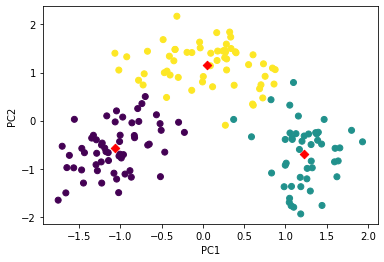

In [ ]:
# 군집결과 시각화
plt.scatter(x=data_prime['PC1'], y=data_prime['PC2'], c=data_prime['k_means_cluster'])
plt.scatter(x=centroids.iloc[:,0], y=centroids.iloc[:,1], marker='D', c='r') # x, y는 각각 factor 1번째(0)와 4번째(3)
plt.xlabel('PC1')
plt.ylabel('PC2')

PC1 PC2로 나타낸 산점도에 각 군집들이 적절하게 군집화가 되어있다 .

하늘색 클러스터는 클러스터1이다. 

클러스터1은 PC1이 큰 걸로 보아   <-Totlal_Phenols ,-Flavanoids , NonFlavanoids_Phenols , -Proanthocyanins >떫지 않은 맛을 표현하는 4개의 수치가 높다고 할 수있다


즉 클러스터1의 와인은 떫지 않은 특징을 가지고 있다.

또한 PC2가 낮은 것으로 보아, -Alcohol(알코올 농도)가  낮고  -Magnesium(마그네슘,쓰지 않은맛)도 낮으며 -Color_Intensity(연한색)가 낮다고 할 수 있다. 따라서 알코올 농도가 높고 쓴 맛을 가지며 색이 짙다고 할 수 있다.

즉 클러스터 1의 와인은 고알코올의 쓴맛을 가지며 짙은 색인 특징을 가지고 있다



보라색 클러스터는 클러스터2이다.

클러스터2는 PC1이 작은걸로 보아   <-Totlal_Phenols ,-Flavanoids , NonFlavanoids_Phenols , -Proanthocyanins >떫지 않은 맛을 표현하는 4개의 수치가 낮고 할 수있다. 

즉 클러스터2의 와인은 떫은 특징을 가지고 있다

또한 PC2가 낮은 것으로 보아, -Alcohol(알코올 농도)가  낮고  -Magnesium(마그네슘,쓰지 않은맛)도 낮으며 -Color_Intensity(연한색)가 낮다고 할 수 있다. 따라서 알코올 농도가 높고 쓴 맛을 가지며 색이 짙다고 할 수 있다.

즉 클러스터 2의 와인은 고알코올의 쓴맛을 가지며 짙은 색인 특징을 가지고 있다.

노란색 클러스터는 클러스터3이다.

클러스터3는 PC1 값에 관계없이 군집화가 되어있으므로 PC1과 상관관계가 크게 있지 않다고 해석 할 수 있다 

또한 PC2가 높은 것으로 보아, -Alcohol(알코올 농도)가  높고  -Magnesium(마그네슘,쓰지 않은맛)도 높으며 -Color_Intensity(연한색)가 높다고 할 수 있다. 따라서 알코올 농도가 낮고 쓰지 않은맛을 가지며 색이 연하다고 할 수 있다.

즉 클러스터 3의 와인은 저알코올의 쓰지 않은 맛을 가지며 옅은 색인 특징을 가지고 있다

PC2가 클러스터 1,2와 클러스터 3을 나누는 주성분으로

PC1이 클러스터 1과 클러스터 2를 나누는 주성분으로 해석할 수 있다.

.

Text(0, 0.5, 'PC3')

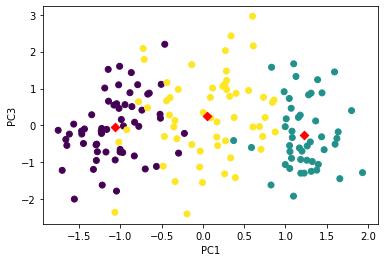

In [ ]:
plt.scatter(x=data_prime['PC1'], y=data_prime['PC3'], c=data_prime['k_means_cluster'])
plt.scatter(x=centroids.iloc[:,0], y=centroids.iloc[:,2], marker='D', c='r') 
plt.xlabel('PC1')
plt.ylabel('PC3')

클러스터 1,2,3 모두 PC1과 PC3로 나타낸 산점도에 적절하게 군집화 되어있다.


앞에서 말햇듯이 클러스터3(노란색)는 PC1 값에 관계없이 군집화가 되어있으므로 PC1과 상관관계가 크게 있지 않고,

 PC1은 클러스터 1,2를 나누는 주성분이라고 해석할 수 있다. 

 클러스터 1,2,3 모두 PC3 값에 관계없이 군집화가 되어있으므로 PC3는 군집의 특징과

 관계가 없다고 해석할 수 있다 . 즉 와인들을 군집분석 할때 PC3의 주요 특징인 청량함은 고려되지 않는다고 해석할 수 있다.

 
(주성분 분석에서 PC를 2개로 한 추가 클러스터링 해석이 필요하다)


Text(0, 0.5, 'PC3')

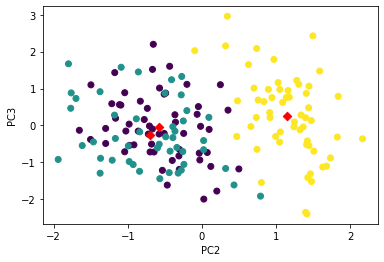

In [ ]:
plt.scatter(x=data_prime['PC2'], y=data_prime['PC3'], c=data_prime['k_means_cluster'])
plt.scatter(x=centroids.iloc[:,1], y=centroids.iloc[:,2], marker='D', c='r')
plt.xlabel('PC2')
plt.ylabel('PC3')

PC2와 PC3로 나타낸 산점도에는 적절하게 군집화 되어 있지 않다



이는 PC2가 높다 낮다로 클러스터1,클러스터2와 클러스터3를 구분 할 수 있지만

PC2가 낮다는 특징을 클러스터 1,2가 모두 갖고있고 PC3는 군집의 특징과 관련이 없기 때문에 클러스터 1,2의 구분이 잘 되지 않는다고 해석된다 .

이 결과 역시 주성분 분석에서 PC를 2개로 한 추가 클러스터링 해석이 필요함을 시사한다

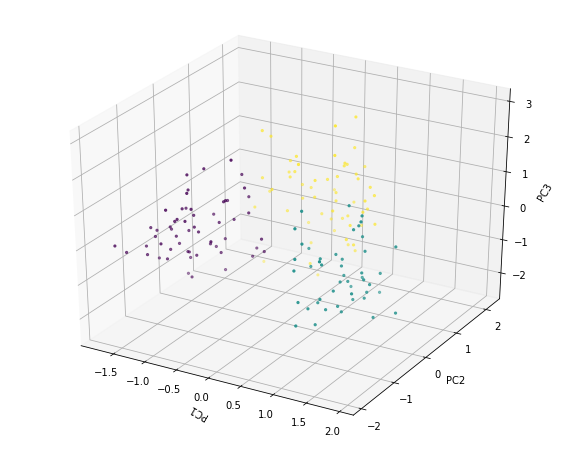

In [ ]:
fig = plt.figure(figsize=(10,8))
ax = fig.gca(projection = '3d')

ax.scatter(data_prime['PC1'], data_prime['PC2'], data_prime['PC3'], s=5, c = data_prime['k_means_cluster'])
ax.set_xlabel('PC1', rotation=150)
ax.set_ylabel('PC2')
ax.set_zlabel(r'PC3', rotation=60)
plt.show()

PC1, PC2 ,PC3 3차원으로 이루어진 산점도를 봤을때는 PC3에 관계없이 

PC1과 PC2가 각 군집들을 잘 나누어주고 있기 때문에 적절하게 군집화가 되어있다고 해석할 수 있다 .

클러스터1,2 와 클러스터 3은 PC2 에 의해 구별된다고 해석할 수 있다. 

클러스터 1,2,3 은 각각 PC1 에 의해 구별된다고 해석할 수 있다.

따라서 와인을 구별해주는 가장 중요한 PC는 PC1이라고 볼 수 있다. 

## Step 4. EDA/Interpretation

In [ ]:
# 군집별 통계
data_prime.groupby('k_means_cluster').mean()

,PC1,PC2,PC3,k_silhouette_coeff
k_means_cluster,,,,
0,-1.064530,-0.575225,-0.047230,0.529862
1,1.225521,-0.703114,-0.260712,0.468673
2,0.054013,1.154985,0.262204,0.433489


* Cluster1:  쓰고 신맛을 갖지 않는 와인 (-PC1) 

* Cluster2: 쓰지 않고 신맛을 갖고(PC1) 과 떨떠름하고 높은 색과 알코올 농도가 낮은 와인(-PC2)

* Cluster3: 쓰지 않고 시지 않은 맛을 갖으며 낮은 색과 알코올 농도를 보이는 와인(PC2)



In [ ]:
data_prime.groupby('k_means_cluster').std()

,PC1,PC2,PC3,k_silhouette_coeff
k_means_cluster,,,,
0,0.361834,0.501716,0.878596,0.099553
1,0.289026,0.634986,0.918981,0.117405
2,0.508433,0.427264,1.131395,0.119876


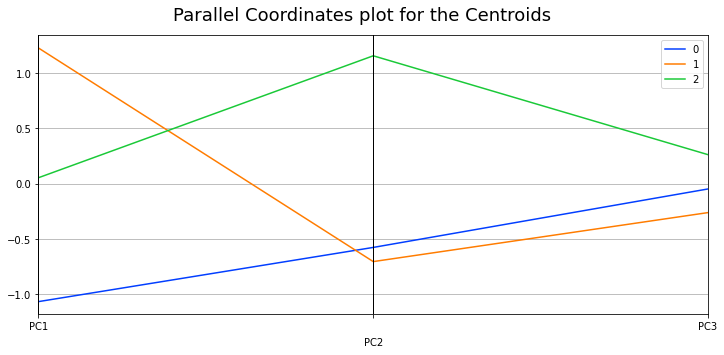

In [ ]:
# Create a data frame containing our centroids
'''https://github.com/OpenClassrooms-Student-Center/Multivariate-Exploratory-Analysis/blob/master/3a.%20K-Means%20Clustering.ipynb'''
centroids['cluster'] = centroids.index

def display_parallel_coordinates_centroids(df, num_clusters):
    '''Display a parallel coordinates plot for the centroids in df'''

    # Create the plot
    fig = plt.figure(figsize=(12, 5))
    title = fig.suptitle("Parallel Coordinates plot for the Centroids", fontsize=18)
    fig.subplots_adjust(top=0.9, wspace=0)

    # Draw the chart
    parallel_coordinates(df, 'cluster', color=palette)

    # Stagger the axes
    ax=plt.gca()
    for tick in ax.xaxis.get_major_ticks()[1::2]:
        tick.set_pad(20)    

display_parallel_coordinates_centroids(centroids, 5)

클러스터1 (0)이 PC1이 크고 PC2가 작고 PC3에서는 별 특징을 보이지 않는다

클러스터2 (1)는 PC1이 작고 PC2도 작으며 PC3에서는 별 특징을 보이지 않는다.

클러스터3 (2)는 PC1에서는 별 특징을 보이지 않고 PC2가 크며 PC3에서도 별 특징을 보이지 않는다.

PC3에서는 뚜렷한 특징을 보이지 않으나 클러스터3(2)>클러스터2(1), 클러스터(1) 순위이다.
나머지 해석은 위와 동일하다.

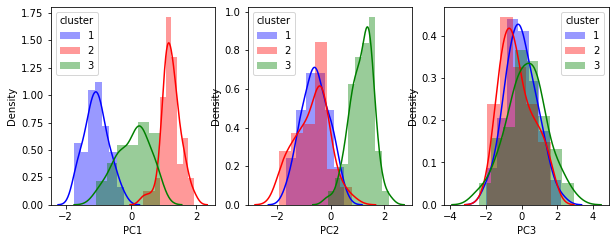

In [ ]:
# 시각화방법 1
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10,8)) 
plt.subplot(2,3,1) 
sns.distplot(data_prime[data_prime.k_means_cluster == 0]["PC1"], 
             color="blue", label=1)
sns.distplot(data_prime[data_prime.k_means_cluster == 1]["PC1"], 
             color="red", label=2)
sns.distplot(data_prime[data_prime.k_means_cluster == 2]["PC1"], 
             color="green", label=3)
plt.legend(title="cluster")


plt.subplot(2,3,2) 
sns.distplot(data_prime[data_prime.k_means_cluster == 0]["PC2"], 
             color="blue", label=1)
sns.distplot(data_prime[data_prime.k_means_cluster == 1]["PC2"], 
             color="red", label=2)
sns.distplot(data_prime[data_prime.k_means_cluster == 2]["PC2"], 
             color="green", label=3)
plt.legend(title="cluster")


plt.subplot(2,3,3)
sns.distplot(data_prime[data_prime.k_means_cluster == 0]["PC3"], 
             color="blue", label=1)
sns.distplot(data_prime[data_prime.k_means_cluster == 1]["PC3"], 
             color="red", label=2)
sns.distplot(data_prime[data_prime.k_means_cluster == 2]["PC3"], 
             color="green", label=3)
plt.legend(title="cluster")

plt.show()

Plot에서도 앞에서 했던 해석과 같이

PC1이 클러스터2(떫지않은특징을 가짐)과 클러스터1(떫은 특징을 가짐)를 나누는 기준이 되고 클러스터2가 PC1이 가장 크다.

(PC1의 주요 변수들이 떫지 않은 맛을 결정하기 때문이다)

PC2가 클러스터 1,2(고알코올 와인)과 클러스터3(저알코올 와인)을 나누는 기준이 되고 클러스터3가 PC2가 가장 크다.

(PC2의 주요 변수인 -Alcohol이 알코올 농도를 결정하기 때문이다)

PC3는 세 군집의 와인들과 크게 상관관계가 없었다. 

(PC3의 주요 변수인 Ash가 청량함을 뜻하는데 진행한 군집분석에서 청량함이 군집을 나누는데 영향을 주지 못했기 때문이다)

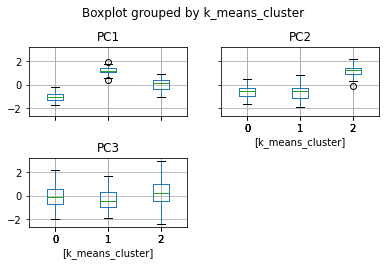

In [ ]:
# 시각화방법 2
data_prime.drop('k_silhouette_coeff', axis=1).boxplot(by='k_means_cluster')
plt.tight_layout(pad=3, h_pad=1)
plt.show()

첫 번째 Plot에서 PC1에 따라 클러스터 0,1가 나누어진다

두 번째 Plot에서 PC2에 따라 클러스터 0,1와 클러스터 2가 나누어진다


세 번째 Plot에서 PC3가 와인들(군집)의 종류에 관계없이 비슷한 것을 한 눈에 확인할 수 있다.

나머지 해석은 위와 동일하다.
따라서 PC의 개수를 2개로 하여 추가적인 군집을 실시했다.

# Appendices
## Density-based Clustering
### DBSCAN(1996, Ester et al.)
- 데이터의 밀도가 임계값보다 높은 부분을 클러스터로, 그 외는 노이즈로 두는 알고리즘 
- 가정
  - 높은 density를 가진 관측치들 간 클러스터를 구성
  - 노이즈 근처의 density는 낮을 것
- 장점
  - 노이즈의 존재를 허용
  - 구형이 아닌 다양한 형태의 클러스터를 찾아낼 수 있음  
  - 클러스터의 개수를 파라미터로 지정하지 않음  

- 범주형 변수가 존재하는 경우 ([참고](https://medium.com/analytics-vidhya/clustering-on-mixed-data-types-in-python-7c22b3898086))
  - 거리를 측정하는 클러스터링을 위해 범주형 변수는 제외하거나 연속형 변수로 형태를 변경해주어야 함
    - one-hot encoding
  - K-modes, k-prototypes 방법 등을 고려

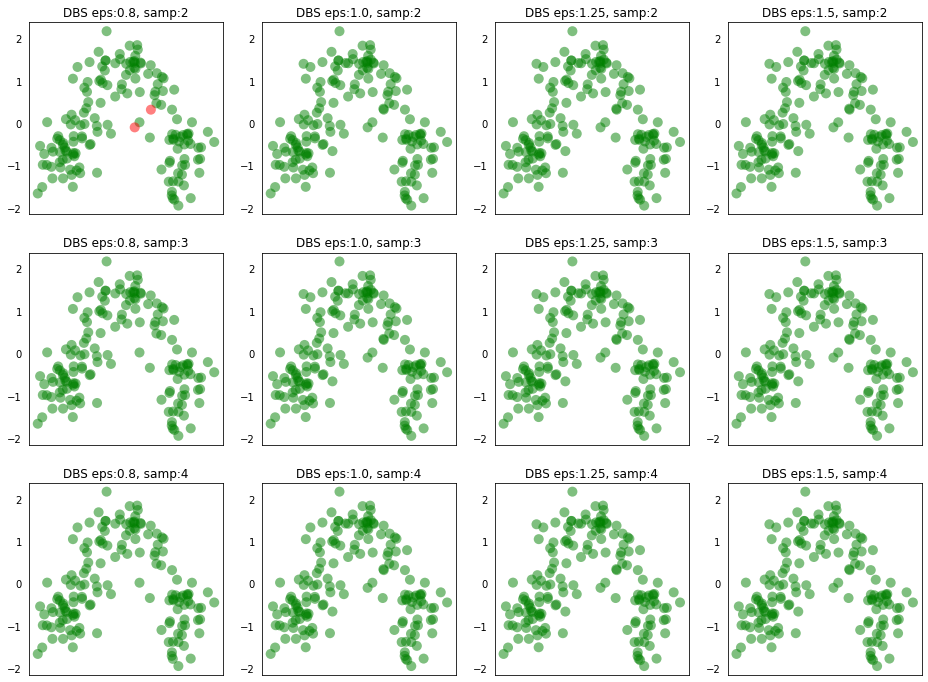

In [ ]:
from sklearn.cluster import DBSCAN
import math
from itertools import product

'''
https://github.com/dougfoo/machineLearning/blob/master/covid/COVID-global-clustering.ipynb
'''

samp_list = [2, 3, 4] # 포함되는 관측치 수 
eps_list = [0.8, 1.0, 1.25, 1.5] # 반경
rows = len(samp_list)

fig, ax = plt.subplots(len(samp_list), len(eps_list), figsize=(16,12))

for k, (eps, samp) in enumerate(product(eps_list, samp_list)):
    PCA_components3 = scaled.copy() # 데이터

    ax[k%rows][math.floor(k/rows)].tick_params(axis='both',which='both',bottom=False,top=False,left=False,labelbottom=False) 
    clustering = DBSCAN(eps=eps, min_samples=samp).fit(PCA_components3)
    PCA_components3.insert(0, 'cluster', clustering.labels_)

    datas = []
    for i in range(len(set(clustering.labels_))): 
        tup = [PCA_components3[PCA_components3['cluster']==i].iloc[:, j] for j in [1, 2]] # 2차원으로 표현 => 몇번째 칼럼을 사용할 것인지 [1, 2]: 2번째, 3번째 칼럼
        datas.append(tup)

    colors = ('green','red','blue','yellow','purple','brown','orange','purple')
    groups = [str(i) for i in range(len(set(clustering.labels_)))]

    for data,color,group in zip(datas,colors,groups):
        x,y = data[0],data[1]
        ax[k%rows][math.floor(k/rows)].scatter(x, y, alpha=0.5, c=color, edgecolors='none', s=100, label=group)
        ax[k%rows][math.floor(k/rows)].set_title(f'DBS eps:{eps}, samp:{samp}')